<a href="https://colab.research.google.com/github/ravi260372/Data_Science_Python/blob/main/Absenteesim_at_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding
This is a data set from the University of California Irvine machine learning repository. This data was created by PhD students in Brazil attending Universidade Nove de Julho working on their thesis. In a brief explanation of the data as the UCI repo web page states in the data’s abstract: “The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.”  
The task at hand is to build a "predictive model" to forecast "Absenteeism"

# Data Understanding

## Import and Clean Data

In [93]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [94]:
# load datafile in workspace
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Absenteeism.csv to Absenteeism (2).csv
User uploaded file "Absenteeism.csv" with length 46712 bytes


In [136]:
# load the data into a dataframe and inspect a few rows
df = pd.read_csv("Absenteeism.csv" , header = 0, delimiter = ",") ## 1st row is the header and data is "comma separated"
df.sample(5).T

,314,48,305,168,438
ID,22,20,5,11,34
Reason for absence,1,22,23,6,28
Month of absence,10,9,10,3,5
Day of the week,4,6,2,5,2
Seasons,4,1,4,2,3
Transportation expense,179,260,235,289,118
Distance from Residence to Work,26,50,20,36,10
Service time,9,11,13,13,10
Age,30,36,43,33,37
Work load Average/day,"265,017","241,476","265,017","343,253","246,074"


One of the column "Work load Average/day" has forward slash and we are replacing to avoid unnecessary errors in future.   
We strip the '/' , replace it with "" and convert this column to float

In [137]:
# cleaning column name
df.columns = df.columns.str.replace('/', 'per').str.strip()
df['Work load Averageperday'] = df['Work load Averageperday'].str.replace(",","").astype(float)
df.sample(1).T

,360
ID,14.0
Reason for absence,23.0
Month of absence,1.0
Day of the week,2.0
Seasons,2.0
Transportation expense,155.0
Distance from Residence to Work,12.0
Service time,14.0
Age,34.0
Work load Averageperday,330061.0


### Missing Values , Unique Counts

In [138]:
# Tabular view of Data {shape of data, the type of data , the missing values , unique counts , % Missing}
# Creating the Data Dictionary with first column being datatype.
Data_dict = pd.DataFrame(df.dtypes)
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.
Data_dict['UniqueVal'] = df.nunique()
# Identifying the missing values from the dataset.
Data_dict['MissingVal'] = df.isnull().sum()
# Percentage of Missing Values
Data_dict['Percent Missing'] = round(df.isnull().sum()/len(df)*100, 2)
# identifying count of the variable.
Data_dict['Count'] = df.count()
# Renaming the first column using rename()
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

,DataType,UniqueVal,MissingVal,Percent Missing,Count
ID,int64,36,0,0.0,740
Reason for absence,int64,28,0,0.0,740
Month of absence,int64,13,0,0.0,740
Day of the week,int64,5,0,0.0,740
Seasons,int64,4,0,0.0,740
Transportation expense,int64,24,0,0.0,740
Distance from Residence to Work,int64,25,0,0.0,740
Service time,int64,18,0,0.0,740
Age,int64,22,0,0.0,740
Work load Averageperday,float64,38,0,0.0,740


#### Errors in Month Column..  
There are 13 Months , which is strange. There seems to be some data corruption


In [139]:
df[df['Month of absence']==0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
737,4,0,0,3,1,118,14,13,40,271219.0,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219.0,95,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271219.0,95,0,1,1,0,0,1,77,175,25,0


This is definitely correupted data seince "Zero Hours Absent" in a dataset that predominantly contains "Abseentism Only". We will drop the rows where "Month of absence" is missing

In [140]:
df = df[df['Month of absence'] != 0]

#### Missing in Target

In [141]:
# how many rows have "Zero Hours Absenteeism"
len(df[df['Absenteeism time in hours']==0])

41

In [142]:
df[df['Absenteeism time in hours']==0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,36,0,7,3,1,118,13,18,50,239554.0,97,1,1,1,1,0,0,98,178,31,0
50,20,0,9,2,4,260,50,11,36,241476.0,92,1,1,4,1,0,0,65,168,23,0
51,29,0,9,2,4,225,26,9,28,241476.0,92,1,1,1,0,0,2,69,169,24,0
54,11,0,9,3,4,289,36,13,33,241476.0,92,1,1,2,1,0,1,90,172,30,0
55,36,0,9,3,4,118,13,18,50,241476.0,92,1,1,1,1,0,0,98,178,31,0
58,13,0,9,4,4,369,17,12,31,241476.0,92,1,1,3,1,0,0,70,169,25,0
64,36,0,10,4,4,118,13,18,50,253465.0,93,1,1,1,1,0,0,98,178,31,0
134,34,27,1,2,2,118,10,10,37,308593.0,95,0,1,0,0,0,0,83,172,28,0
203,2,0,4,2,3,235,29,12,48,326452.0,96,1,1,1,0,1,5,88,163,33,0
213,7,0,5,4,3,279,5,14,39,378884.0,92,1,1,2,1,1,0,68,168,24,0


There are 41 rows with zero values in Absenteeism in hours of which 40 rows are for disciplinary failure.There maybe "data entry errors". On the safer side let us drop these 41 rows where "Absenteeism Time is Zero"

In [143]:
df = df[df['Absenteeism time in hours'] != 0]

In [144]:
# Tabular view of Data {shape of data, the type of data , the missing values , unique counts , % Missing}
# Creating the Data Dictionary with first column being datatype.
Data_dict = pd.DataFrame(df.dtypes)
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.
Data_dict['UniqueVal'] = df.nunique()
# Identifying the missing values from the dataset.
Data_dict['MissingVal'] = df.isnull().sum()
# Percentage of Missing Values
Data_dict['Percent Missing'] = round(df.isnull().sum()/len(df)*100, 2)
# identifying count of the variable.
Data_dict['Count'] = df.count()
# Renaming the first column using rename()
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

,DataType,UniqueVal,MissingVal,Percent Missing,Count
ID,int64,33,0,0.0,696
Reason for absence,int64,27,0,0.0,696
Month of absence,int64,12,0,0.0,696
Day of the week,int64,5,0,0.0,696
Seasons,int64,4,0,0.0,696
Transportation expense,int64,23,0,0.0,696
Distance from Residence to Work,int64,23,0,0.0,696
Service time,int64,18,0,0.0,696
Age,int64,21,0,0.0,696
Work load Averageperday,float64,37,0,0.0,696


# Exploratory Data Analysis

In [145]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Averageperday', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

## Univariate Numerical Indicators  
* Create a dataframe of purely numeric columns  
* Examine Numeric Statistics
* Histogram/Distribution 
* Visualize the Correlation Matrix  

In [146]:
# create a dataframe of pure numeric columns
data_num = df[['Transportation expense' ,'Distance from Residence to Work' , 'Service time', 'Age', 'Work load Averageperday' , 'Hit target' , 
               'Weight', 'Height', 'Body mass index']]
data_num.sample(5)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,Hit target,Weight,Height,Body mass index
328,235,11,14,37,284031.0,97,88,172,29
505,369,17,12,31,261756.0,87,70,169,25
138,246,25,16,41,302585.0,99,67,170,23
449,246,25,16,41,253957.0,95,67,170,23
15,246,25,16,41,239554.0,97,67,170,23


In [147]:
# numerical statistics
data_num.describe()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,Hit target,Weight,Height,Body mass index
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,219.916667,29.853448,12.553161,36.254310,271165.718391,94.719828,78.751437,172.132184,26.573276
std,65.803295,14.855615,4.440175,6.380725,39096.003153,3.656150,12.730748,6.087118,4.192879
min,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,56.000000,163.000000,19.000000
25%,179.000000,16.000000,9.000000,31.000000,243659.250000,93.000000,69.000000,169.000000,24.000000
50%,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,80.000000,170.000000,25.000000
75%,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,89.000000,172.000000,31.000000
max,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,108.000000,196.000000,38.000000


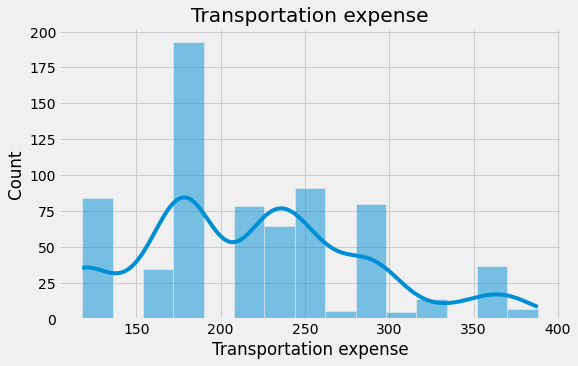

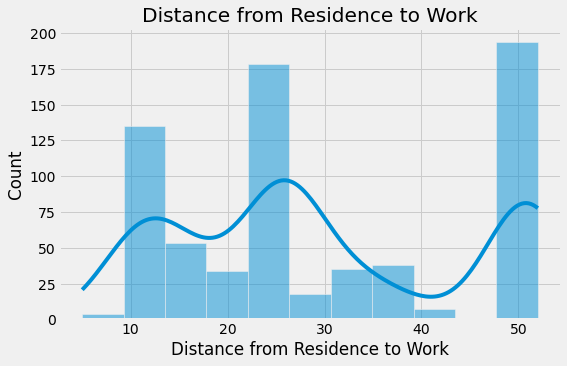

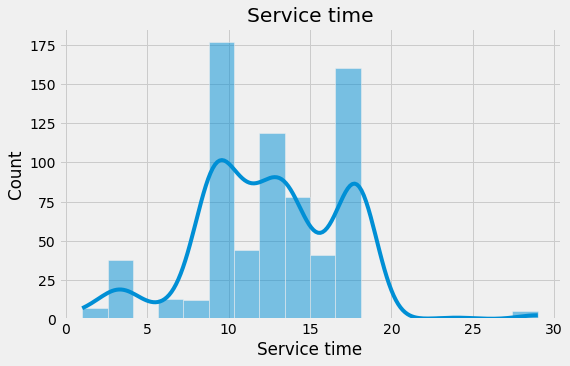

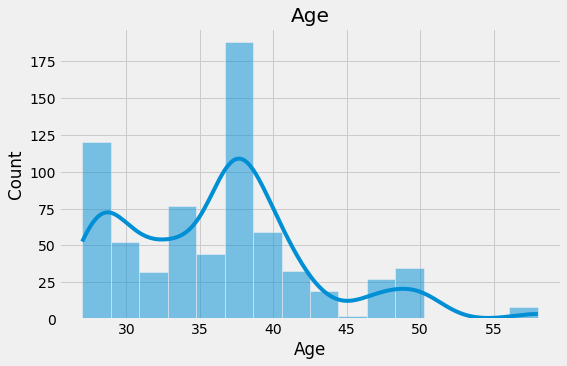

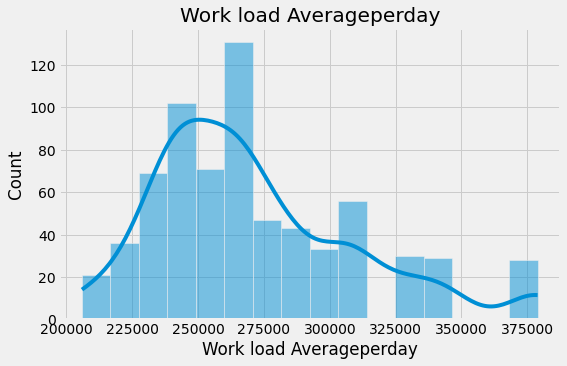

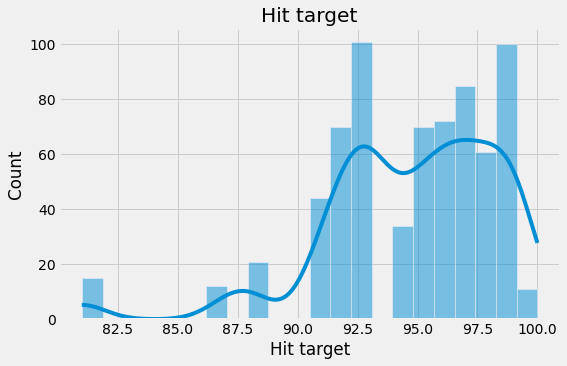

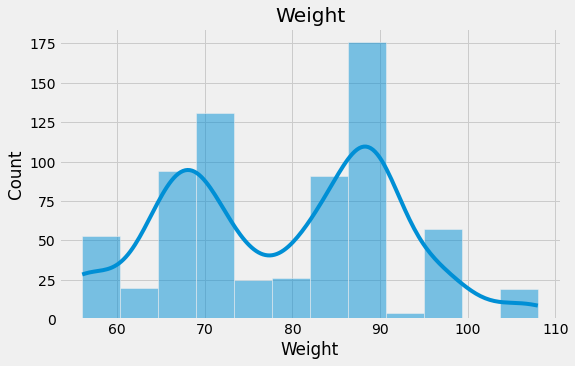

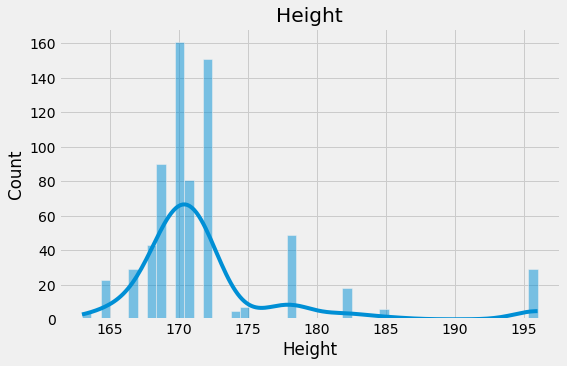

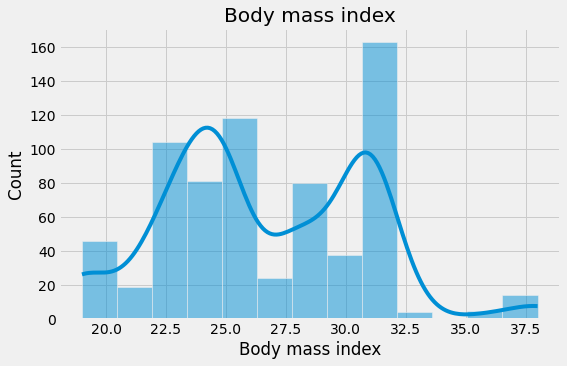

In [148]:
# Histogram
for i in data_num.columns:
    plt.figure(figsize=(8,5))
    plt.title(i)
    sns.histplot(data_num[i] , kde = True);

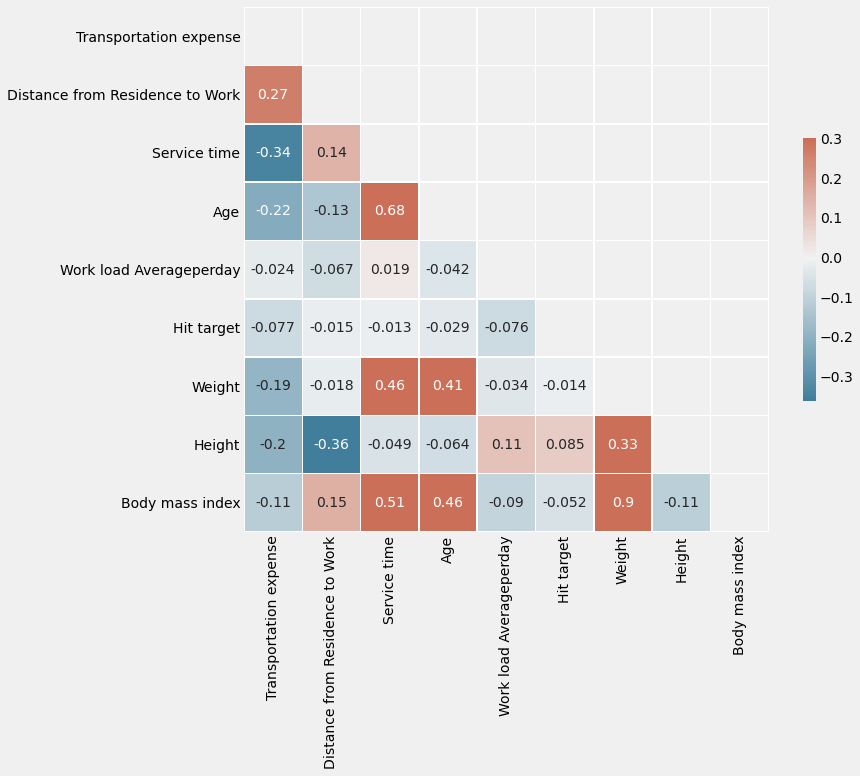

In [149]:
# correlation heatmap
# Compute the correlation matrix
corr = data_num.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5} , annot = True);

**Inference** 
* All Numeric Indicators exhibit "Multi Modal Distributions" with multiple scales. Scaling / Normalization will be needed before modeling
* BMI and Weight are highly correlated. We will drop BMI  

## Univariate Categorical Indicators 
* Create a subset of categorical columns  
* Visualize Count plot of each categorical variable

In [150]:
data_cat = df[['Reason for absence', 'Month of absence', 
            'Day of the week', 'Seasons', 'Disciplinary failure', 
            'Education', 'Son', 'Social drinker', 'Social smoker',
            'Pet']]

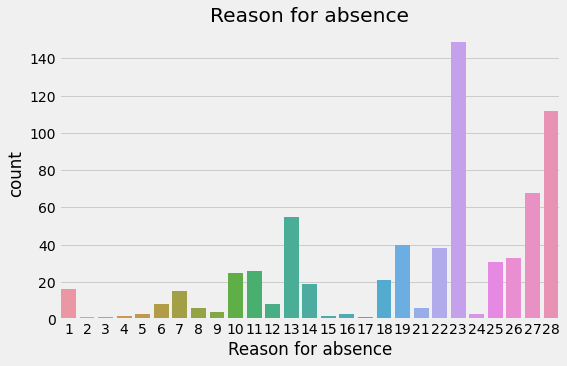

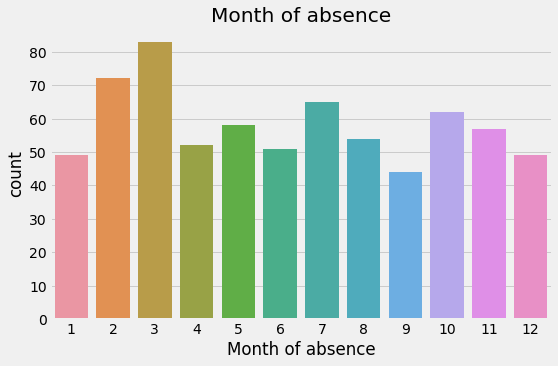

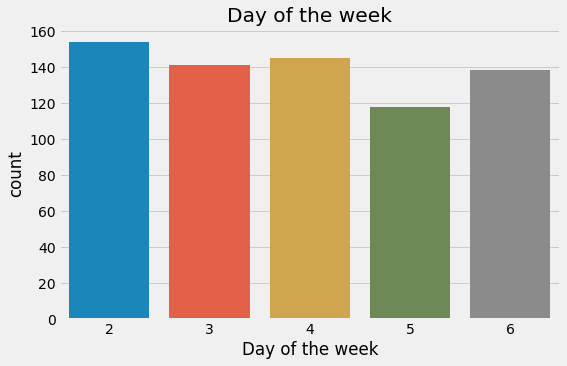

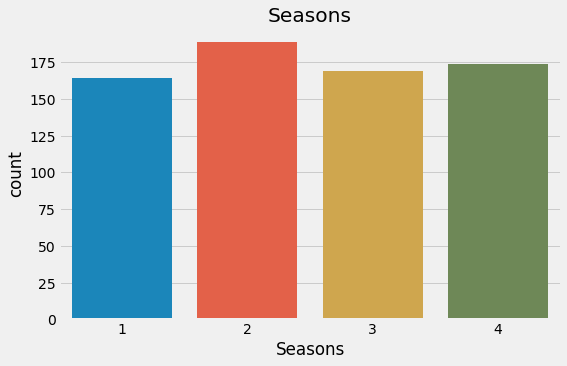

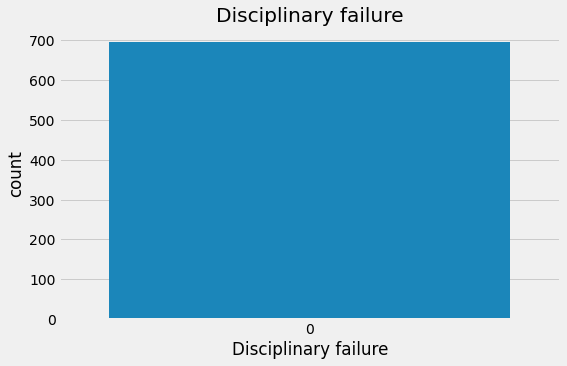

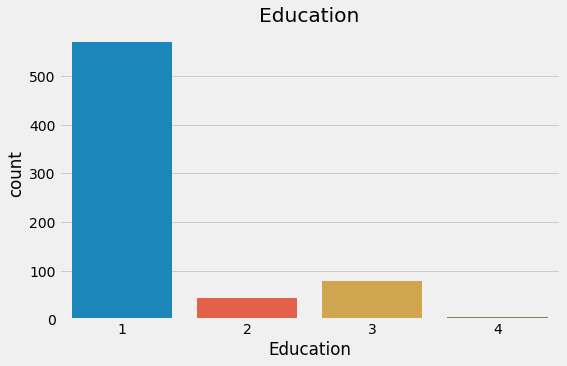

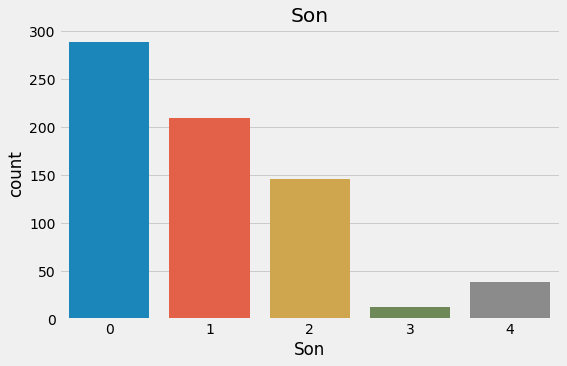

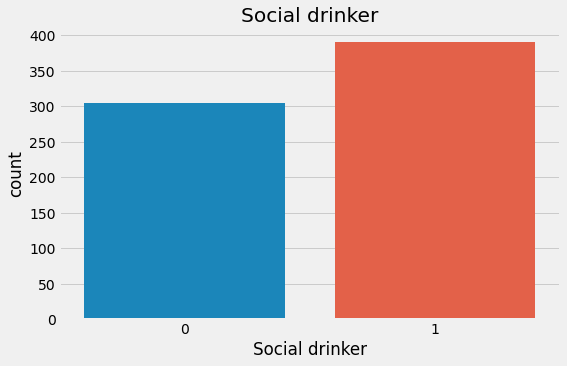

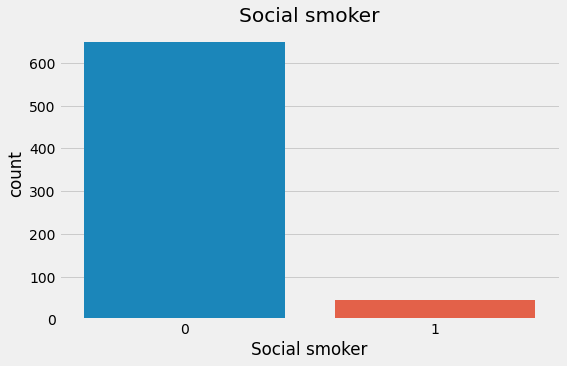

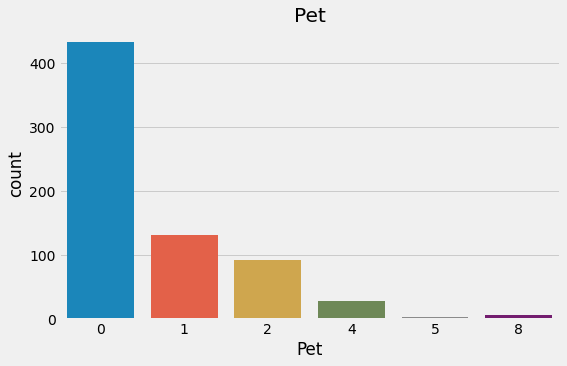

In [151]:
# barplot of categorical variables with diffrent sub-category counts
for i in data_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(i)
    sns.countplot(data_cat[i]);

**Inference**  
* Reason 23 i.e. Medical consultation followed by Reason 28 Dental consultation are the top 2 reasons for absenteeism  
* February and March have the highest absenteeisms  
* Monday i.e. start of the week has the highest absentees.  
* Highest Absenteeism in Autumn followed by Spring  
* High School workers record the highest Absenteeism  
* Social Drinkers and Non Smokers have the highest absentee hours  
* Workers with no son and no pet record the highest absentee hours

## Data Preparation for Modeling  
* Drop BMI since it is highly correlated to Weight
* Drop ID since this is not a unique indicator and may impair modeling

In [164]:
# drop BMI and ID  
df.drop(['Body mass index', 'ID'], axis=1 , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 736
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               696 non-null    int64  
 1   Month of absence                 696 non-null    int64  
 2   Day of the week                  696 non-null    int64  
 3   Seasons                          696 non-null    int64  
 4   Transportation expense           696 non-null    int64  
 5   Distance from Residence to Work  696 non-null    int64  
 6   Service time                     696 non-null    int64  
 7   Age                              696 non-null    int64  
 8   Work load Averageperday          696 non-null    float64
 9   Hit target                       696 non-null    int64  
 10  Disciplinary failure             696 non-null    int64  
 11  Education                        696 non-null    int64  
 12  Son                   

## Baseline Regression Model for feature Extraction  
We will use the statsmodel package from scipy to build a baseline linear regression model to select importaant features

In [165]:
# import the package
import statsmodels.api as sm


In [166]:
## Creating array of Feature X
X= df[ df.columns[df.columns!='Absenteeism time in hours'] ]

## Creating the array of Target y
y = df[['Absenteeism time in hours']]

## shape of X
print(X.shape)

## shape of y
print(y.shape)

(696, 18)
(696, 1)


In [167]:
# add constant
X = sm.add_constant(X)

In [168]:
# fit the OLS Linear Regression model
Smodel = sm.OLS(y, X).fit()

In [169]:
# model summary
Smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.147
Model:                                   OLS   Adj. R-squared:                  0.125
Method:                        Least Squares   F-statistic:                     6.859
Date:                       Fri, 19 Mar 2021   Prob (F-statistic):           2.05e-15
Time:                               14:53:44   Log-Likelihood:                -2749.9
No. Observations:                        696   AIC:                             5536.
Df Residuals:                            678   BIC:                             5618.
Df Model:                                 17                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -32.1061     25.771     -1.246      0.213     -82.706      18.494
Reason for absence                 -0.5303      0.072     -7.411      0.000      -0.671      -0.390
Month of absence                    0.0951      0.189      0.504      0.614      -0.275       0.466
Day of the week                    -0.9176      0.352     -2.605      0.009      -1.609      -0.226
Seasons                            -0.0565      0.512     -0.110      0.912      -1.063       0.950
Transportation expense              0.0025      0.010      0.245      0.806      -0.017       0.022
Distance from Residence to Work    -0.0563      0.054     -1.051      0.294      -0.162       0.049
Service time                        0.0585      0.203      0.289      0.773      -0.339       0.456
Age                                 0.1711      0.121      1.416      0.157      -0.066       0.408
Work load Averageperday         -7.995e-06   1.39e-05     -0.577      0.564   -3.52e-05    1.92e-05
Hit target                          0.1178      0.157      0.750      0.454      -0.191       0.426
Disciplinary failure            -8.058e-14   6.49e-14     -1.242      0.215   -2.08e-13    4.68e-14
Education                          -1.2850      0.857     -1.499      0.134      -2.968       0.398
Son                                 1.1599      0.522      2.222      0.027       0.135       2.185
Social drinker                      2.1948      1.617      1.357      0.175      -0.980       5.370
Social smoker                      -2.9565      2.150     -1.375      0.170      -7.179       1.266
Pet                                 0.0140      0.507      0.028      0.978      -0.982       1.010
Weight                             -0.1045      0.056     -1.865      0.063      -0.214       0.006
Height                              0.2691      0.115      2.332      0.020       0.043       0.496
==============================================================================
Omnibus:                      739.868   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34848.833
Skew:                           5.080   Prob(JB):                         0.00
Kurtosis:                      36.143   Cond. No.                     2.30e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.9e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Inference :  
1. The modeled Features can explain only 15% of the variation in the target. 
2. Reviewing the p-value (P>|t|) of regression coefficients corresponding to the purely numeric features Transportation Expense , Distance from Work , Service Time , Age , Work Load Average Per Day , Hit Target and Weight  we infer that these features are not statistically significant at level α=0.05. In other words, the regression coefficients corresponding to these features are not significantly different from 0 in the population. Hence these features may be eliminated from the multiple regression model. We will still retain the "purely categorial variables".

## Regression with Sci-Kit Learn

In [175]:
print(X.shape)
print(y.shape)

(696, 19)
(696, 1)


## Feature Scaling

In [177]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
transformed_X = scaler.fit_transform(X)
transformed_X

scld_feats_df = pd.DataFrame(transformed_X,columns=X.columns)
scld_feats_df.head()
#scld_votes_df.describe()

,const,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height
0,0.0,0.925926,0.545455,0.25,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.5,1.0,0.0,0.125,0.653846,0.272727
1,0.0,0.814815,0.545455,0.50,0.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,0.0,1.0,0.0,0.000,0.634615,0.212121
2,0.0,0.222222,0.545455,0.75,0.0,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.0,0.5,1.0,1.0,0.000,0.230769,0.151515
3,0.0,0.814815,0.545455,0.75,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.5,1.0,0.0,0.125,0.653846,0.272727
4,0.0,0.814815,0.545455,1.00,0.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,0.0,1.0,0.0,0.000,0.634615,0.212121


## Create Feature and Target Arrays

In [180]:
## Creating array of Feature X
X= scld_feats_df

## Creating the array of Target y
y = df[['Absenteeism time in hours']]

## shape of X
print(X.shape)
print(type(X))

## shape of y
print(y.shape)
print(type(y))

(696, 19)
<class 'pandas.core.frame.DataFrame'>
(696, 1)
<class 'pandas.core.frame.DataFrame'>


#### Train test Split

In [181]:
from sklearn.model_selection import train_test_split
#Create train and test data with 80% and 20% split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.20,random_state=0)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(556, 19)
(140, 19)
(556, 1)
(140, 1)


### Fitting a Linear Regression Model

In [182]:
#Create instance of model 
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

print(lm)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [183]:
# Fit the model
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [184]:
# Predict on Test Data
predict_test=lm.predict(test_x)

In [185]:
#Evaluate the model performance by passing Actual values of test data and predicted values of test data 
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error(MAE) for test data is")
np.round(mean_absolute_error(test_y,predict_test),2)

Mean Absolute Error(MAE) for test data is


6.06

## Fitting a Decision Tree Regression Model

In [192]:
# Create an Instance of the model
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state = 0 , max_depth = 5) 
print(dtree)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')


In [193]:
# Fit the model
dtree.fit(train_x,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [194]:
# Predict on Test Data
predict_test_tree=dtree.predict(test_x)

In [195]:
#Evaluate the model performance by passing Actual values of test data and predicted values of test data 
print("Mean Absolute Error(MAE) for test data is")
np.round(mean_absolute_error(test_y,predict_test_tree),2)

Mean Absolute Error(MAE) for test data is


5.5

In [199]:
from sklearn import tree
# convert to visualization data for graphviz
dot_data = tree.export_graphviz(dtree , out_file = None , 
                                feature_names = X.columns , 
                                filled = True,
                                rounded = True , 
                                special_characters = True)

In [201]:
!pip install graphviz

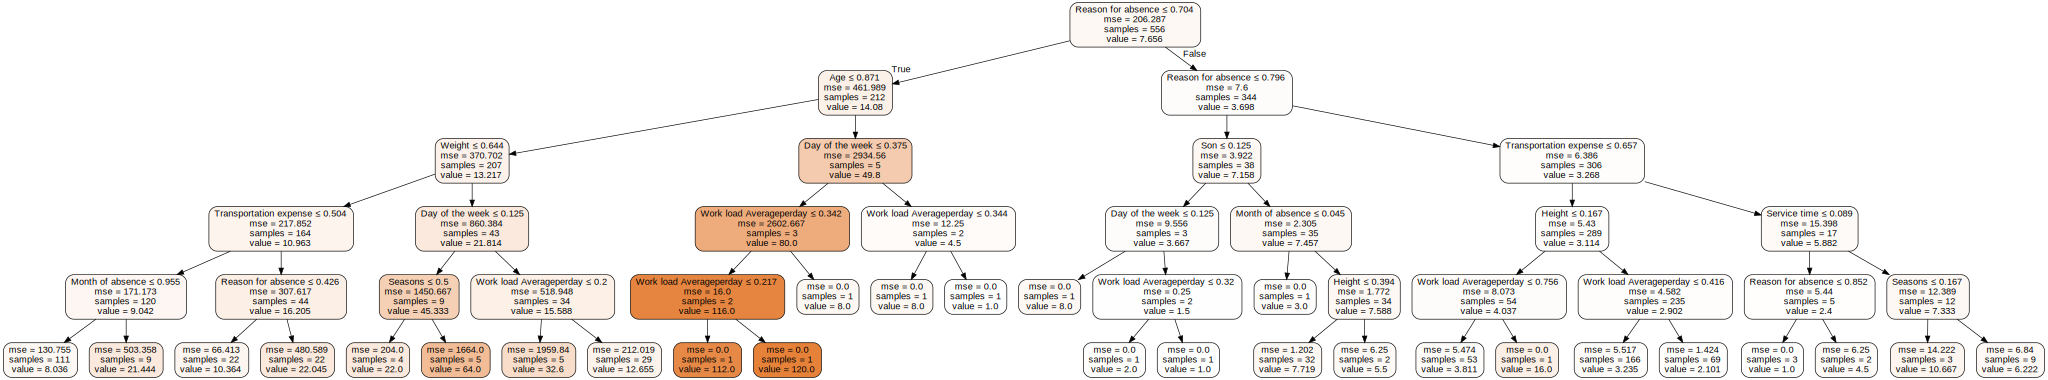

In [203]:
# visualize the tree
import graphviz
graph = graphviz.Source(dot_data)
graph